<h1><center>Entrega 2 <h1>

# Librerias

In [188]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Preguntas:

¿Existen combinaciones de apps que se descargan juntas? Ya que si ciertas apps se descargan juntas podemos estar frente a un “ecosistema digital” 

¿Qué tipo de usuarios tienden a usar ciertas categorías de apps? Con esto, se puede mejorar el enfoque de las aplicaciones o las estrategias de marketing. 

¿Existen días donde los usuarios tiendan a usar más una aplicación que otra? Aquí podemos identificar diferentes patrones. 

¿Influye el rating de las aplicaciones con las descargas de estas? Porque esto ayuda al entendimiento de la confianza digital y las decisiones de descargas de los usuarios


# Archivo `screen_time`

Pregunta a responder **¿Existen días donde los usuarios tiendan a usar más una aplicación que otra? Aquí podemos identificar diferentes patrones.**

In [189]:
df_screen = pd.read_csv("archivos_limpios\screen_times_limpio.csv")
df_screen.head()

,Date,App,Usage (minutes),Notifications,Times Opened
0,2024-08-07,Instagram,81,24,57
1,2024-08-08,Instagram,90,30,53
2,2024-08-26,Instagram,112,33,17
3,2024-08-22,Instagram,82,11,38
4,2024-08-12,Instagram,59,47,16


## Descripcion de df_screen

In [190]:
df_screen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             200 non-null    object
 1   App              200 non-null    object
 2   Usage (minutes)  200 non-null    int64 
 3   Notifications    200 non-null    int64 
 4   Times Opened     200 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


Contiene **registros diarios del uso de aplicaciones** por parte de un usuario.


* **Date**: Fecha del registro de uso
* **App**: Nombre de la aplicacion usada 
* **Usage (minutes)**: Tiempo total de uso de la app en minutos ese dia
* **Notifications**: Número de notificaciones recibidas por esa app
* **Times Opened**: Número de veces que se abrió la app durante ese dia

In [191]:
df_screen.describe()

,Usage (minutes),Notifications,Times Opened
count,200.000000,200.000000,200.00000
mean,37.750000,28.735000,21.63000
std,29.711299,35.801726,24.27301
min,1.000000,0.000000,1.00000
25%,17.000000,1.750000,4.00000
50%,26.000000,11.500000,10.00000
75%,51.250000,47.000000,32.00000
max,119.000000,147.000000,99.00000


In [192]:
df_screen['App'].value_counts()

App
Instagram      25
X              25
WhatsApp       25
8 Ball Pool    25
Safari         25
Netflix        25
Facebook       25
LinkedIn       25
Name: count, dtype: int64

## Visualizacion

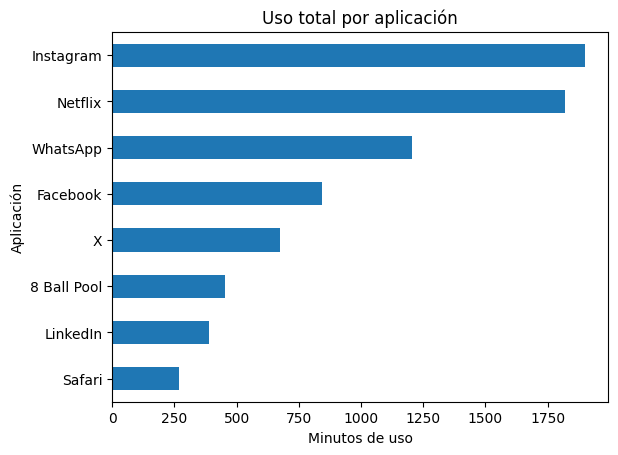

In [193]:
# Uso total por app
df_screen.groupby('App')['Usage (minutes)'].sum().sort_values().plot(kind='barh')
plt.title('Uso total por aplicación')
plt.xlabel('Minutos de uso')
plt.ylabel('Aplicación')
plt.show()


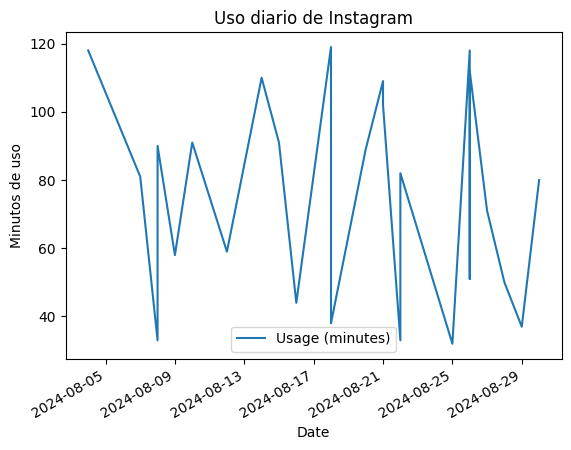

In [194]:
# 2. Uso diario de una app específica 
df_screen['Date'] = pd.to_datetime(df_screen['Date'])
instagram = df_screen[df_screen['App'] == 'Instagram']
instagram.sort_values('Date').plot(x='Date', y='Usage (minutes)', kind='line')
plt.title('Uso diario de Instagram')
plt.ylabel('Minutos de uso')
plt.show()


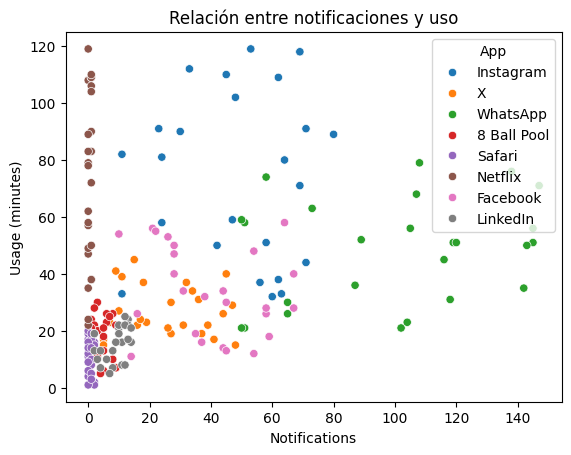

In [195]:
# Notificaciones vs Uso
sns.scatterplot(data=df_screen, x='Notifications', y='Usage (minutes)', hue='App')
plt.title('Relación entre notificaciones y uso')
plt.show()


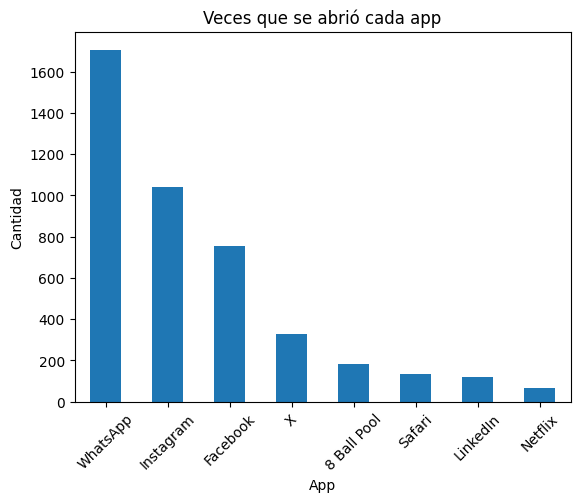

In [196]:
#  Veces que se abrio cada app en total
df_screen.groupby('App')['Times Opened'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Veces que se abrió cada app')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()


## Correlaciones

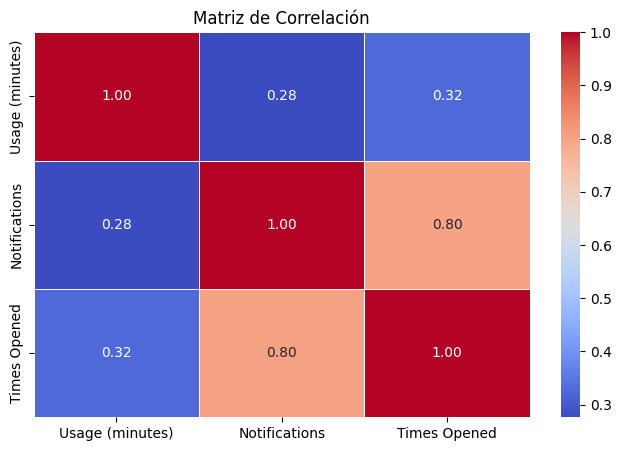

In [197]:
columnas_numericas = ['Usage (minutes)', 'Notifications', 'Times Opened']
matriz_correlacion = df_screen[columnas_numericas].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

## Agrupar por semana

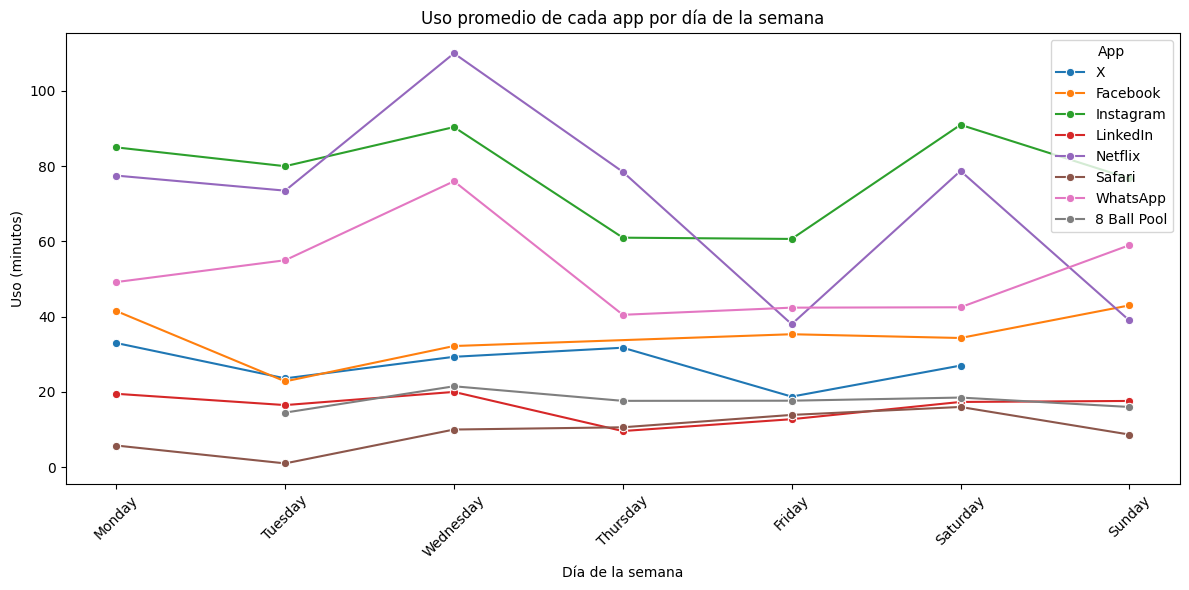

In [198]:
df_screen['Date'] = pd.to_datetime(df_screen['Date'])

# 1. Extraer día de la semana
df_screen['DayOfWeek'] = df_screen['Date'].dt.day_name()

# 2. Calcular el uso promedio por día y por app
uso_por_dia = df_screen.groupby(['DayOfWeek', 'App'])['Usage (minutes)'].mean().reset_index()

# 3. Ordenar los días de la semana
dias_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
uso_por_dia['DayOfWeek'] = pd.Categorical(uso_por_dia['DayOfWeek'], categories=dias_orden, ordered=True)
uso_por_dia.sort_values('DayOfWeek', inplace=True)

# 4. Gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(data=uso_por_dia, x='DayOfWeek', y='Usage (minutes)', hue='App', marker='o')
plt.title('Uso promedio de cada app por día de la semana')
plt.ylabel('Uso (minutos)')
plt.xlabel('Día de la semana')
plt.xticks(rotation=45)
plt.legend(title='App')
plt.tight_layout()
plt.show()


C:\Users\tomas\AppData\Local\Temp\ipykernel_29344\4041814807.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=uso_festivos, x='Festivo', y='Usage (minutes)', palette='Set2')


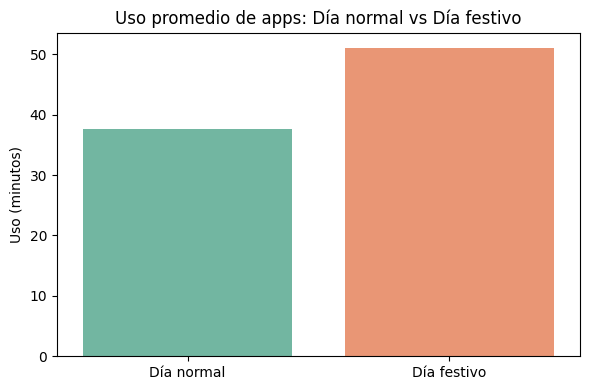

In [199]:
dias_festivos = [
    '2024-01-01', '2024-05-01', '2024-07-16', '2024-08-15', '2024-09-18', '2024-09-19',
    '2024-10-31', '2024-11-01', '2024-12-08', '2024-12-25'
]
dias_festivos = pd.to_datetime(dias_festivos)

# Crear columna 'Festivo'
df_screen['Festivo'] = df_screen['Date'].isin(dias_festivos)

# Agrupar por días festivos y calcular promedio de uso
uso_festivos = df_screen.groupby('Festivo')['Usage (minutes)'].mean().reset_index()

# Etiquetas más claras para gráfico
uso_festivos['Festivo'] = uso_festivos['Festivo'].map({True: 'Día festivo', False: 'Día normal'})

# Paso 6: Visualizar con gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(data=uso_festivos, x='Festivo', y='Usage (minutes)', palette='Set2')
plt.title('Uso promedio de apps: Día normal vs Día festivo')
plt.ylabel('Uso (minutos)')
plt.xlabel('')
plt.tight_layout()
plt.show()


## Normalizar

**Segun chatgpt no es necesario normalizar**

In [200]:
columnas_normalizar = ['Usage (minutes)', 'Notifications', 'Times Opened']

scaler = MinMaxScaler()
df_screen_normalizado = df_screen.copy()
df_screen_normalizado[columnas_normalizar] = scaler.fit_transform(df_screen[columnas_normalizar])



In [201]:
df_screen_normalizado.head()

,Date,App,Usage (minutes),Notifications,Times Opened,DayOfWeek,Festivo
0,2024-08-07,Instagram,0.677966,0.163265,0.571429,Wednesday,False
1,2024-08-08,Instagram,0.754237,0.204082,0.530612,Thursday,False
2,2024-08-26,Instagram,0.940678,0.224490,0.163265,Monday,False
3,2024-08-22,Instagram,0.686441,0.074830,0.377551,Thursday,False
4,2024-08-12,Instagram,0.491525,0.319728,0.153061,Monday,False


In [202]:
df_screen_normalizado[columnas_normalizar].describe()


,Usage (minutes),Notifications,Times Opened
count,200.000000,200.000000,200.000000
mean,0.311441,0.195476,0.210510
std,0.251791,0.243549,0.247684
min,0.000000,0.000000,0.000000
25%,0.135593,0.011905,0.030612
50%,0.211864,0.078231,0.091837
75%,0.425847,0.319728,0.316327
max,1.000000,1.000000,1.000000


# Archivo `moblie_usuage`


Pregunta a responder: **¿Qué tipo de usuarios tienden a usar ciertas categorías de apps? Con esto, se puede mejorar el enfoque de las aplicaciones o las estrategias de marketing.**

Tal vez cambiar horas a minutos

In [203]:
df_moblie = pd.read_csv("archivos_limpios\moblie_usuage_limpio.csv")
df_moblie.head()

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location
0,1,56,Male,2.61,7.15,24,4.43,0.55,2.40,Los Angeles
1,2,46,Male,2.13,13.79,18,4.67,4.42,2.43,Chicago
2,3,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston
3,4,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix
4,5,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York


## Descripcion de moblie_usuage

In [204]:
df_moblie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User_ID                       1000 non-null   int64  
 1   Age                           1000 non-null   int64  
 2   Gender                        1000 non-null   object 
 3   Total_App_Usage_Hours         1000 non-null   float64
 4   Daily_Screen_Time_Hours       1000 non-null   float64
 5   Number_of_Apps_Used           1000 non-null   int64  
 6   Social_Media_Usage_Hours      1000 non-null   float64
 7   Productivity_App_Usage_Hours  1000 non-null   float64
 8   Gaming_App_Usage_Hours        1000 non-null   float64
 9   Location                      1000 non-null   object 
dtypes: float64(5), int64(3), object(2)
memory usage: 78.3+ KB


Contiene **informacion agregada del uso de aplicaciones por usuarios**

* **User_ID**: Identificador del usuario (no sirve)
* **Age**: Edad del usuario
* **Gender**: Género del usuario 
* **Total_App_Usage_Hours**: Horas totales de uso de aplicaciones
* **Daily_Screen_Time_Hours**: Horas promedio al dia que el usuario pasa en pantalla
* **Number_of_Apps_Used**: Número de aplicaciones distintas usadas
* **Social_Media_Usage_Hours**: Horas dedicadas al uso de redes sociales
* **Productivity_App_Usage_Hours**: Horas dedicadas al uso de apps de productividad
* **Gaming_App_Usage_Hours**: Horas dedicadas al uso de apps de juegos
* **Location**: Ciudad de residencia del usuario (no sirve)

In [205]:
df_moblie.describe(include='all')

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location
count,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,New York
freq,NaN,NaN,517,NaN,NaN,NaN,NaN,NaN,NaN,243
mean,500.500000,38.745000,NaN,6.405670,7.696310,16.64700,2.456330,2.495270,2.475410,NaN
std,288.819436,12.186734,NaN,3.134855,3.714187,7.61961,1.439525,1.443392,1.450362,NaN
min,1.000000,18.000000,NaN,1.000000,1.010000,3.00000,0.000000,0.000000,0.010000,NaN
25%,250.750000,28.000000,NaN,3.590000,4.530000,10.00000,1.200000,1.282500,1.220000,NaN
50%,500.500000,40.000000,NaN,6.455000,7.880000,17.00000,2.445000,2.435000,2.455000,NaN
75%,750.250000,50.000000,NaN,9.122500,10.910000,23.00000,3.672500,3.710000,3.782500,NaN


## Graficos

C:\Users\tomas\AppData\Local\Temp\ipykernel_29344\2216440890.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedios = df_moblie.groupby('AgeGroup')[


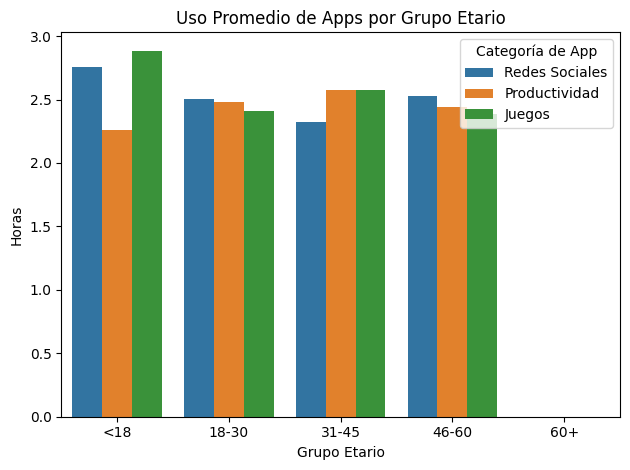

In [206]:
# Creamos categorías de edad
bins = [0, 18, 30, 45, 60, 100]
labels = ['<18', '18-30', '31-45', '46-60', '60+']
df_moblie['AgeGroup'] = pd.cut(df_moblie['Age'], bins=bins, labels=labels)

# Promedio de horas de uso por grupo etario y categoría de app
promedios = df_moblie.groupby('AgeGroup')[
    ['Social_Media_Usage_Hours', 'Productivity_App_Usage_Hours', 'Gaming_App_Usage_Hours']
].mean().reset_index()

# Transformamos a formato largo (para seaborn)
df_long = pd.melt(promedios, id_vars='AgeGroup', 
                  var_name='App Category', 
                  value_name='Average Usage (hrs)')

# Renombrar categorías para claridad
df_long['App Category'] = df_long['App Category'].replace({
    'Social_Media_Usage_Hours': 'Redes Sociales',
    'Productivity_App_Usage_Hours': 'Productividad',
    'Gaming_App_Usage_Hours': 'Juegos'
})

sns.barplot(data=df_long, x='AgeGroup', y='Average Usage (hrs)', hue='App Category')
plt.title("Uso Promedio de Apps por Grupo Etario")
plt.ylabel("Horas")
plt.xlabel("Grupo Etario")
plt.legend(title="Categoría de App")
plt.tight_layout()
plt.show()


C:\Users\tomas\AppData\Local\Temp\ipykernel_29344\2136038828.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df_moblie.groupby(["AgeGroup", "Gender"])[[
C:\Users\tomas\AppData\Local\Temp\ipykernel_29344\2136038828.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_melt, x="AgeGroup", y="Avg_Hours", hue="Gender", palette="Set1", ci=None)


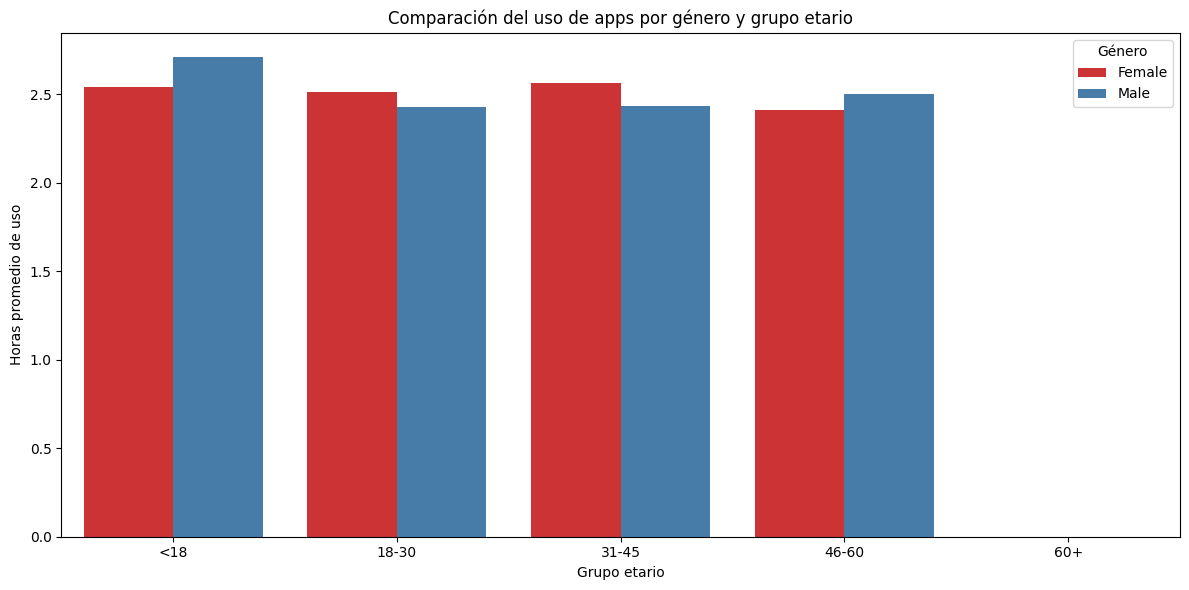

In [207]:
# Agrupamos por grupo de edad y género, y promediamos el uso de apps
df_grouped = df_moblie.groupby(["AgeGroup", "Gender"])[[
    "Social_Media_Usage_Hours",
    "Productivity_App_Usage_Hours",
    "Gaming_App_Usage_Hours"
]].mean().reset_index()

# Reorganizamos para graficar
df_melt = df_grouped.melt(id_vars=["AgeGroup", "Gender"],
                          value_vars=[
                              "Social_Media_Usage_Hours",
                              "Productivity_App_Usage_Hours",
                              "Gaming_App_Usage_Hours"
                          ],
                          var_name="App_Category",
                          value_name="Avg_Hours")

# Traducimos nombres de columnas para mejor presentación
df_melt["App_Category"] = df_melt["App_Category"].replace({
    "Social_Media_Usage_Hours": "Redes Sociales",
    "Productivity_App_Usage_Hours": "Productividad",
    "Gaming_App_Usage_Hours": "Juegos"
})

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melt, x="AgeGroup", y="Avg_Hours", hue="Gender", palette="Set1", ci=None)
plt.title("Comparación del uso de apps por género y grupo etario")
plt.xlabel("Grupo etario")
plt.ylabel("Horas promedio de uso")
plt.legend(title="Género")
plt.tight_layout()
plt.show()


C:\Users\tomas\AppData\Local\Temp\ipykernel_29344\1327060527.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df_moblie.groupby(["AgeGroup", "Gender"])[[


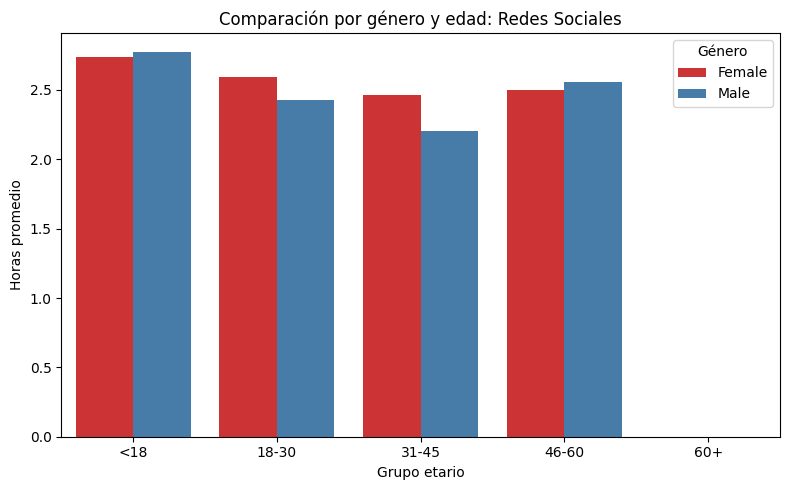

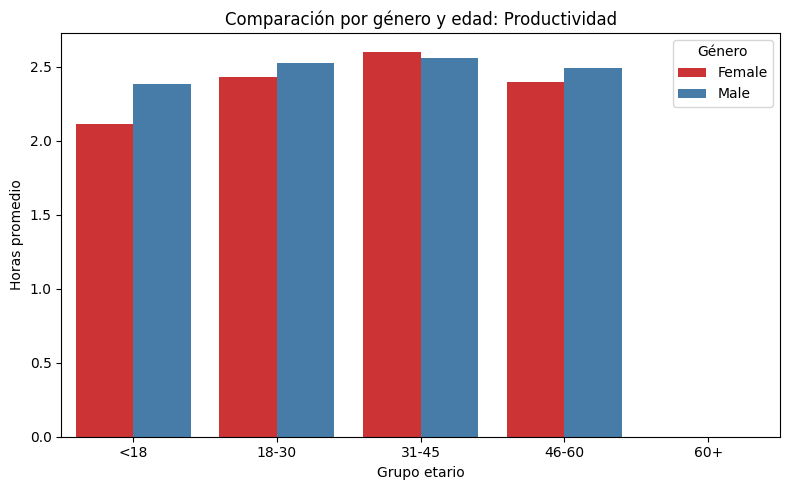

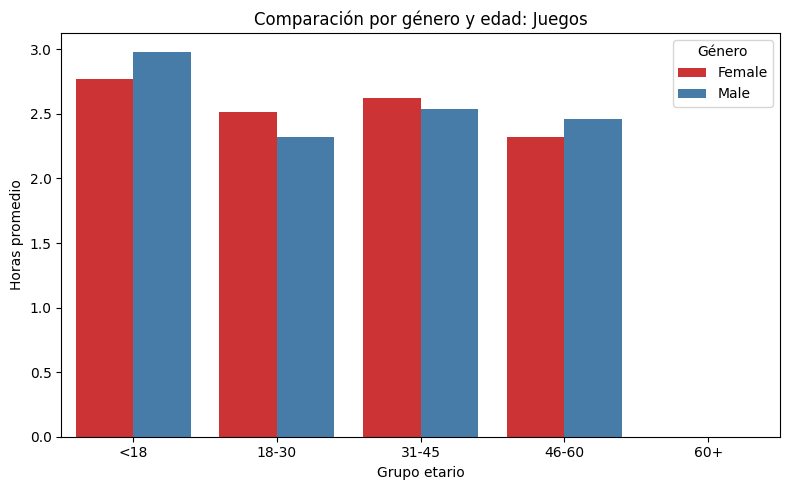

In [208]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por grupo etario y género
df_grouped = df_moblie.groupby(["AgeGroup", "Gender"])[[
    "Social_Media_Usage_Hours",
    "Productivity_App_Usage_Hours",
    "Gaming_App_Usage_Hours"
]].mean().reset_index()

# Reorganizar para formato largo
df_melt = df_grouped.melt(
    id_vars=["AgeGroup", "Gender"],
    value_vars=[
        "Social_Media_Usage_Hours",
        "Productivity_App_Usage_Hours",
        "Gaming_App_Usage_Hours"
    ],
    var_name="App_Category",
    value_name="Avg_Hours"
)

# Traducir nombres de columnas
df_melt["App_Category"] = df_melt["App_Category"].replace({
    "Social_Media_Usage_Hours": "Redes Sociales",
    "Productivity_App_Usage_Hours": "Productividad",
    "Gaming_App_Usage_Hours": "Juegos"
})

# Lista de categorías
categorias = ["Redes Sociales", "Productividad", "Juegos"]

# Crear un gráfico por categoría
for categoria in categorias:
    plt.figure(figsize=(8, 5))
    data_cat = df_melt[df_melt["App_Category"] == categoria]
    sns.barplot(data=data_cat, x="AgeGroup", y="Avg_Hours", hue="Gender", palette="Set1")
    plt.title(f"Comparación por género y edad: {categoria}")
    plt.xlabel("Grupo etario")
    plt.ylabel("Horas promedio")
    plt.legend(title="Género")
    plt.tight_layout()
    plt.show()


## Correlacion

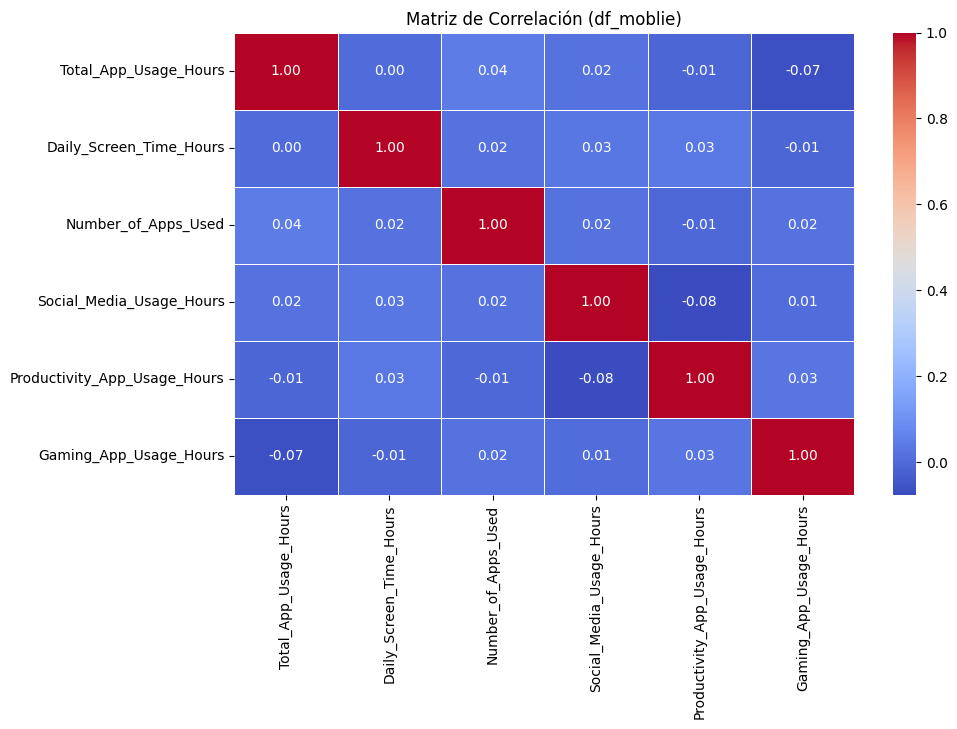

In [209]:
columnas_numericas = [
    'Total_App_Usage_Hours',
    'Daily_Screen_Time_Hours',
    'Number_of_Apps_Used',
    'Social_Media_Usage_Hours',
    'Productivity_App_Usage_Hours',
    'Gaming_App_Usage_Hours'
]

matriz_correlacion = df_moblie[columnas_numericas].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación (df_moblie)")
plt.show()


## Normalizar

In [210]:
df_moblie.head()

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location,AgeGroup
0,1,56,Male,2.61,7.15,24,4.43,0.55,2.40,Los Angeles,46-60
1,2,46,Male,2.13,13.79,18,4.67,4.42,2.43,Chicago,46-60
2,3,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston,31-45
3,4,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix,18-30
4,5,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York,31-45


In [213]:
columnas_normalizar = [
    'Social_Media_Usage_Hours',
    'Productivity_App_Usage_Hours',
    'Gaming_App_Usage_Hours'
]

df_normalizar = df_moblie.copy()

scaler = MinMaxScaler()
df_normalizar[columnas_normalizar] = scaler.fit_transform(df_moblie[columnas_normalizar])

df_normalizar[columnas_normalizar].describe()


,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours
count,1000.000000,1000.000000,1000.000000
mean,0.492251,0.499054,0.494070
std,0.288482,0.288678,0.290654
min,0.000000,0.000000,0.000000
25%,0.240481,0.256500,0.242485
50%,0.489980,0.487000,0.489980
75%,0.735972,0.742000,0.756012
max,1.000000,1.000000,1.000000
